## Descriptores de textura

- LBP
- GLCM

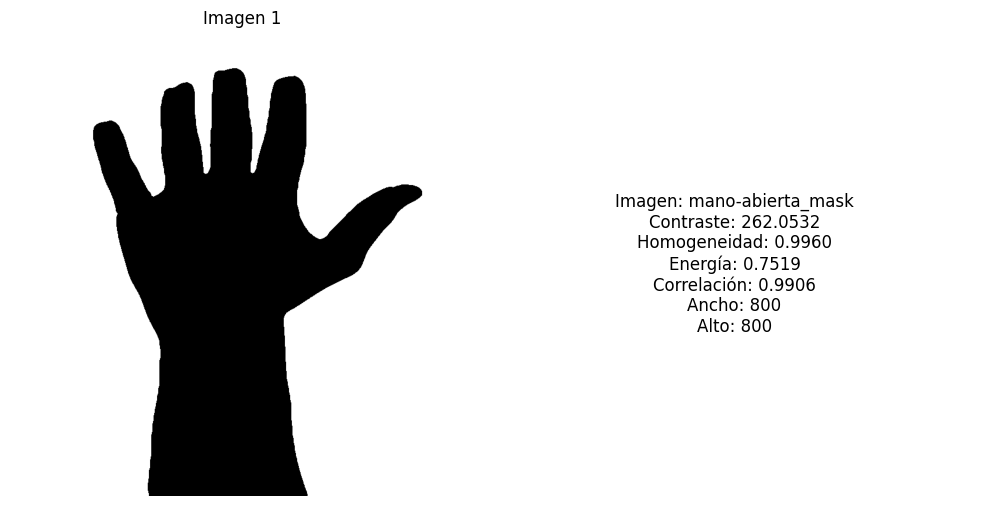


✓ Procesamiento de texturas completado para mano-abierta_mask
  - Resultados guardados en: data/caracteristicas/texturas/mano-abierta_mask_texturas.png


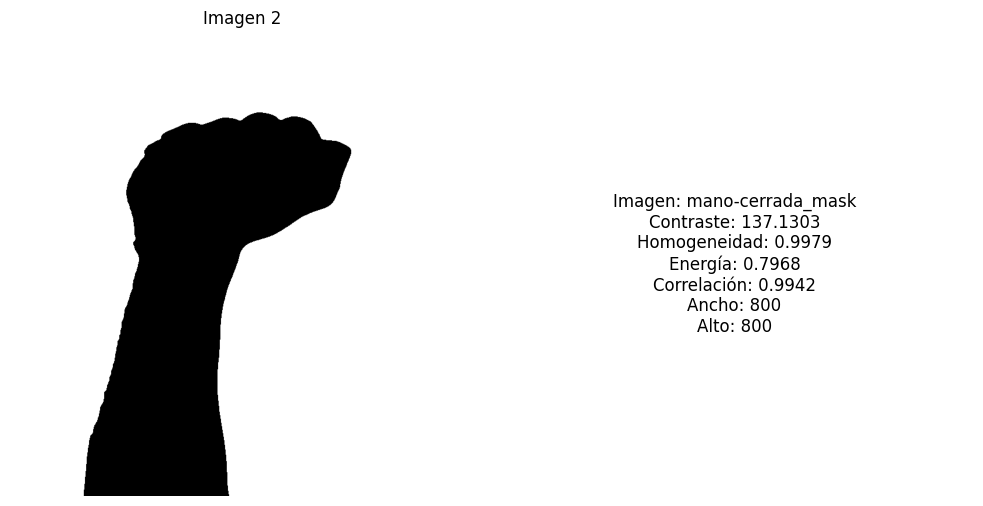


✓ Procesamiento de texturas completado para mano-cerrada_mask
  - Resultados guardados en: data/caracteristicas/texturas/mano-cerrada_mask_texturas.png


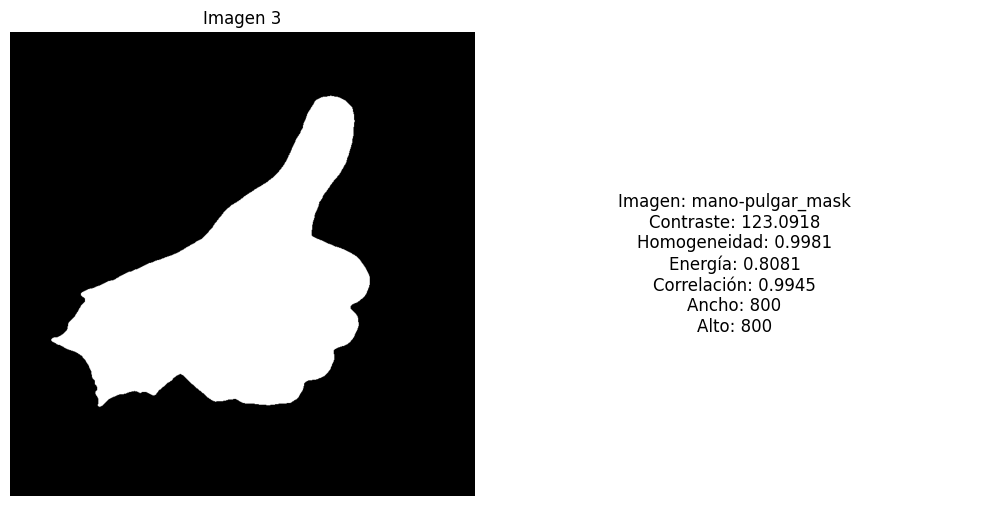


✓ Procesamiento de texturas completado para mano-pulgar_mask
  - Resultados guardados en: data/caracteristicas/texturas/mano-pulgar_mask_texturas.png


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops

# Rutas y lista
os.makedirs('data/caracteristicas', exist_ok=True)
os.makedirs('data/caracteristicas/texturas', exist_ok=True)

imagenes = ['data/procesadas/mano-abierta_mask.png', 'data/procesadas/mano-cerrada_mask.png', 'data/procesadas/mano-pulgar_mask.png']
all_metrics = []

for imagen in imagenes:
    img_name = os.path.splitext(os.path.basename(imagen))[0]

    img = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"No se pudo leer la imagen '{imagen}'")
        continue

    # LBP
    lbp = local_binary_pattern(img, P=8, R=1, method='uniform')

    # GLCM
    glcm = graycomatrix(img, distances=[1], angles=[0], symmetric=True, normed=True)

    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    metrics = {
        'Imagen': img_name,
        'Contraste': contrast,
        'Homogeneidad': homogeneity,
        'Energía': energy,
        'Correlación': correlation,
        'Ancho': img.shape[1],
        'Alto': img.shape[0]
    }

    all_metrics.append((img, metrics))

# Mostrar imágenes y métricas
for idx, (img, metrics) in enumerate(all_metrics):
    plt.figure(figsize=(10, 5))

    # Mostrar imagen
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Imagen {idx + 1}")
    plt.axis('off')

    # Mostrar métricas
    plt.subplot(1, 2, 2)
    plt.axis('off')
    metric_text = "\n".join([f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}" for key, value in metrics.items()])
    plt.text(0.5, 0.5, metric_text, fontsize=12, ha='center', va='center')

    plt.tight_layout()

    # Guardar figura comparativa
    output_path = os.path.join('data/caracteristicas/texturas', f"{metrics['Imagen']}_texturas.png")
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    plt.show()

    print(f"\n✓ Procesamiento de texturas completado para {metrics['Imagen']}")
    print(f"  - Resultados guardados en: {output_path}")

## Detección de bordes
- Sobel
- Canny

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Rutas y lista
os.makedirs('data/caracteristicas', exist_ok=True)
os.makedirs('data/caracteristicas/bordes', exist_ok=True)

imagenes = ['data/procesadas/mano-abierta_mask.png', 'data/procesadas/mano-cerrada_mask.png', 'data/procesadas/mano-pulgar_mask.png']

# Función para calcular métricas
def calcular_metricas(edges, name, img_gray):
    # Contar píxeles de borde
    edge_pixels = np.sum(edges > 0)
    total_pixels = edges.size
    edge_ratio = (edge_pixels / total_pixels) * 100  # Porcentaje

    # Intensidad media y desviación estándar
    edge_intensities = img_gray[edges > 0]
    mean_intensity = np.mean(edge_intensities) if len(edge_intensities) > 0 else 0
    std_intensity = np.std(edge_intensities) if len(edge_intensities) > 0 else 0

    return {
        'Método': name,
        'Píxeles_Borde': edge_pixels,
        'Porcentaje_Borde': edge_ratio,
        'Intensidad_Media': mean_intensity,
        'Desviación_Estándar': std_intensity
    }

for imagen in imagenes:
    img_name = os.path.splitext(os.path.basename(imagen))[0]

    img = cv2.imread(imagen)
    if img is None:
        print(f"No se pudo leer la imagen '{imagen}'")
        continue

    # Leer la imagen en escala de grises
    gray = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)

    # Crear carpeta específica para esta imagen
    output_dir = os.path.join('data/caracteristicas/bordes', img_name)
    os.makedirs(output_dir, exist_ok=True)

    # --- Canny ---
    edges_canny = cv2.Canny(gray, threshold1=50, threshold2=150)
    plt.figure()
    plt.imshow(edges_canny, cmap='gray', vmin=0, vmax=255)
    plt.title("Canny")
    plt.axis('off')
    output_path_canny = os.path.join(output_dir, "canny.png")
    plt.savefig(output_path_canny, dpi=150, bbox_inches='tight')
    plt.close()

    # --- Sobel ---
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)
    sobel = cv2.convertScaleAbs(sobel)
    plt.figure()
    plt.imshow(sobel, cmap='gray', vmin=0, vmax=255)
    plt.title("Sobel")
    plt.axis('off')
    output_path_sobel = os.path.join(output_dir, "sobel.png")
    plt.savefig(output_path_sobel, dpi=150, bbox_inches='tight')
    plt.close()

    # --- Laplaciano ---
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)
    plt.figure()
    plt.imshow(laplacian, cmap='gray', vmin=0, vmax=255)
    plt.title("Laplaciano")
    plt.axis('off')
    output_path_laplacian = os.path.join(output_dir, "laplacian.png")
    plt.savefig(output_path_laplacian, dpi=150, bbox_inches='tight')
    plt.close()

    # Calcular métricas para cada método
    metricas_canny = calcular_metricas(edges_canny, "Canny", gray)
    metricas_sobel = calcular_metricas(sobel, "Sobel", gray)
    metricas_laplacian = calcular_metricas(laplacian, "Laplaciano", gray)

    # Guardar métricas en archivo de texto
    metrics_file = os.path.join(output_dir, "metricas.txt")
    with open(metrics_file, 'w') as f:
        f.write(f"=== Métricas de detección de bordes - {img_name} ===\n\n")
        
        for metricas in [metricas_canny, metricas_sobel, metricas_laplacian]:
            f.write(f"{metricas['Método']}:\n")
            f.write(f"  - Píxeles de borde: {metricas['Píxeles_Borde']}\n")
            f.write(f"  - Porcentaje de borde: {metricas['Porcentaje_Borde']:.2f}%\n")
            f.write(f"  - Intensidad media: {metricas['Intensidad_Media']:.2f}\n")
            f.write(f"  - Desviación estándar: {metricas['Desviación_Estándar']:.2f}\n")
            f.write("\n")

    # Mostrar información en consola
    print(f"\n✓ Procesamiento de bordes completado para {img_name}")
    print(f"  - Carpeta: {output_dir}/")
    print(f"  - Archivos guardados:")
    print(f"    • canny.png")
    print(f"    • sobel.png")
    print(f"    • laplacian.png")
    print(f"    • metricas.txt")


✓ Procesamiento de bordes completado para mano-abierta_mask
  - Carpeta: data/caracteristicas/bordes/mano-abierta_mask/
  - Archivos guardados:
    • canny.png
    • sobel.png
    • laplacian.png
    • metricas.txt

✓ Procesamiento de bordes completado para mano-cerrada_mask
  - Carpeta: data/caracteristicas/bordes/mano-cerrada_mask/
  - Archivos guardados:
    • canny.png
    • sobel.png
    • laplacian.png
    • metricas.txt

✓ Procesamiento de bordes completado para mano-pulgar_mask
  - Carpeta: data/caracteristicas/bordes/mano-pulgar_mask/
  - Archivos guardados:
    • canny.png
    • sobel.png
    • laplacian.png
    • metricas.txt


## Formas




Detectando formas en: mano-abierta_mask


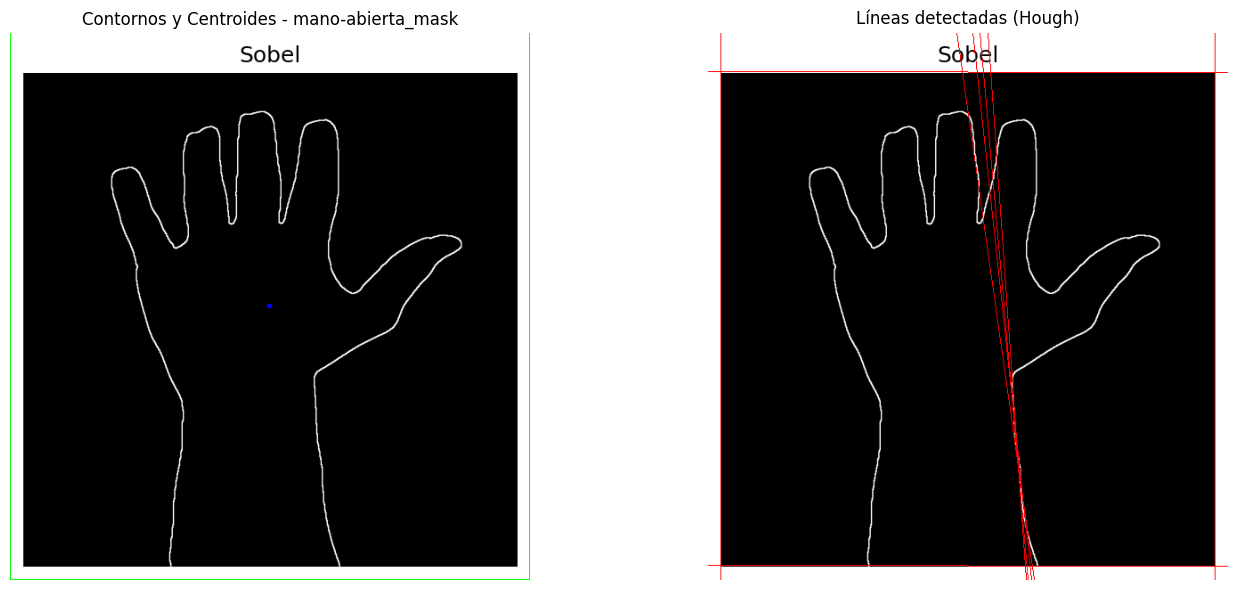

✓ Análisis de formas completado para: mano-abierta_mask
  - Carpeta: data/caracteristicas/formas/mano-abierta_mask/
  - Archivos guardados:
    • contornos_centroides.jpg
    • lineas_hough.jpg
    • analisis_formas.jpg
    • metricas.txt

Detectando formas en: mano-cerrada_mask


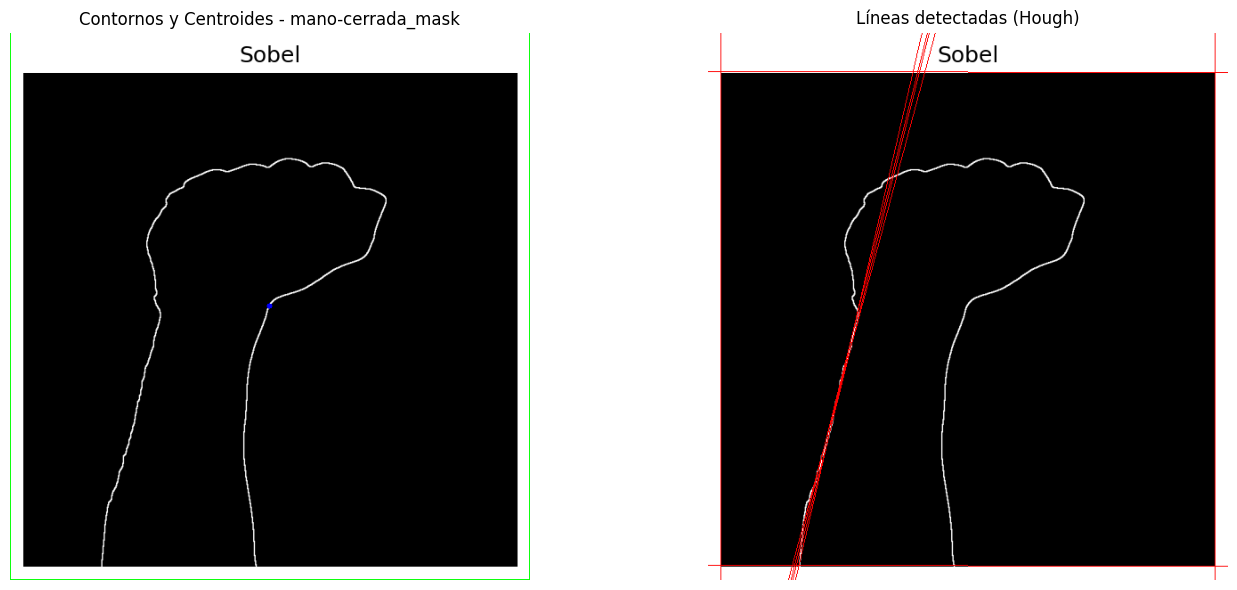

✓ Análisis de formas completado para: mano-cerrada_mask
  - Carpeta: data/caracteristicas/formas/mano-cerrada_mask/
  - Archivos guardados:
    • contornos_centroides.jpg
    • lineas_hough.jpg
    • analisis_formas.jpg
    • metricas.txt

Detectando formas en: mano-pulgar_mask


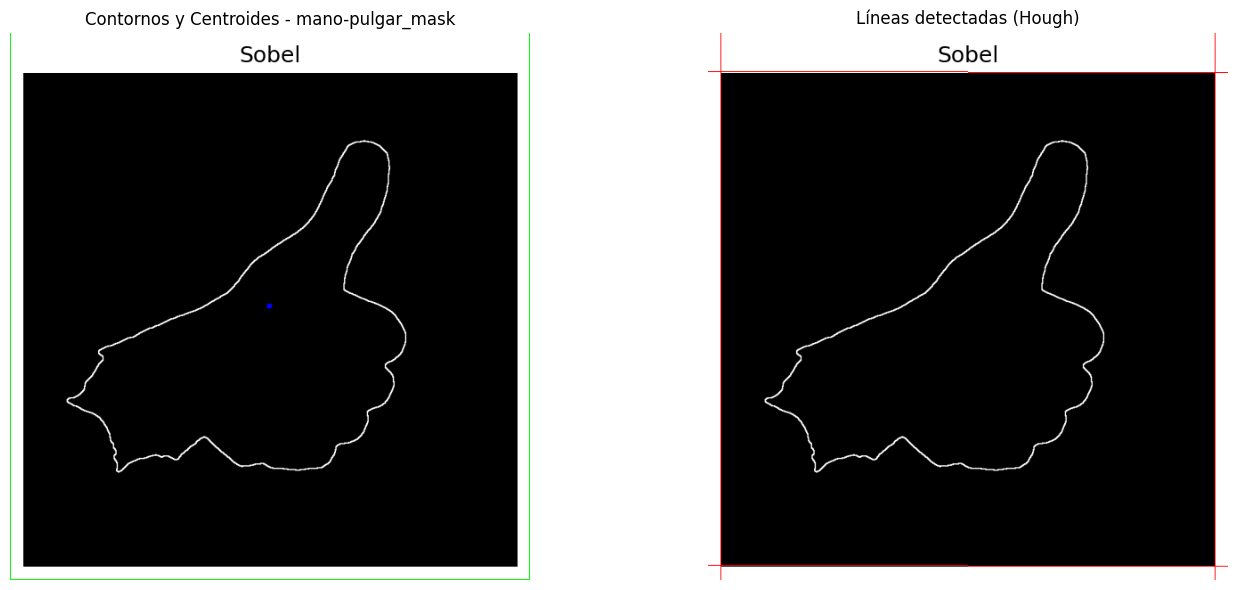

✓ Análisis de formas completado para: mano-pulgar_mask
  - Carpeta: data/caracteristicas/formas/mano-pulgar_mask/
  - Archivos guardados:
    • contornos_centroides.jpg
    • lineas_hough.jpg
    • analisis_formas.jpg
    • metricas.txt

¡Análisis de formas completado para todas las imágenes!


In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Lista de imágenes de bordes
imagenes_bordes = [
    'data/caracteristicas/bordes/mano-abierta_mask_sobel.png',
    'data/caracteristicas/bordes/mano-cerrada_mask_sobel.png',
    'data/caracteristicas/bordes/mano-pulgar_mask_sobel.png',
   
]

for img_path in imagenes_bordes:
    try:
        # Extraer el nombre de la imagen de la ruta (sin extensión y sin el sufijo _sobel)
        img_basename = os.path.basename(img_path)  # mano-abierta_mask_sobel.png
        img_name = os.path.splitext(img_basename)[0]  # mano-abierta_mask_sobel
        # Remover el sufijo del método de detección (_sobel, _canny, etc.)
        img_name = img_name.rsplit('_', 1)[0]  # mano-abierta_mask
        
        print(f"\n{'='*50}")
        print(f"Detectando formas en: {img_name}")
        print(f"{'='*50}")
        
        # 1. Cargar imagen de bordes
        if not os.path.exists(img_path):
            print(f"Error: No se encontró la imagen de bordes en {img_path}")
            continue
            
        # Leer la imagen en escala de grises
        gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # 2. Binarización para detectar formas
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # 3. Encontrar contornos
        contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # 4. Crear imágenes para visualización
        img_contours = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        img_hough = img_contours.copy()
        
        # 5. Dibujar contornos y calcular centroides
        cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 1)
        
        # Crear carpeta específica para esta imagen
        output_dir = os.path.join('data/caracteristicas/formas', img_name)
        os.makedirs(output_dir, exist_ok=True)
        metrics_file = os.path.join(output_dir, "metricas.txt")
        
        with open(metrics_file, 'w') as f:
            f.write(f"=== Métricas de contornos - {img_name} ===\n")
            f.write(f"Número de contornos encontrados: {len(contours)}\n\n")
            
            for i, c in enumerate(contours):
                # Calcular momentos y centroide
                M = cv2.moments(c)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    area = cv2.contourArea(c)
                    perimeter = cv2.arcLength(c, True)
                    
                    # Dibujar centroide
                    cv2.circle(img_contours, (cx, cy), 3, (255, 0, 0), -1)
                    
                    # Escribir métricas
                    f.write(f"Contorno {i+1}:\n")
                    f.write(f"  - Área: {area:.2f} px²\n")
                    f.write(f"  - Perímetro: {perimeter:.2f} px\n")
                    f.write(f"  - Centroide: ({cx}, {cy})\n")
                    f.write("\n")
        
        # 6. Detección de líneas con Hough
        edges = cv2.Canny(gray, 100, 200)
        lines = cv2.HoughLines(edges, 1, np.pi/180, 100)
        
        if lines is not None:
            for line in lines:
                rho, theta = line[0]
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                cv2.line(img_hough, (x1, y1), (x2, y2), (0, 0, 255), 1)
        
        # 7. Guardar resultados en la carpeta específica de la imagen
        cv2.imwrite(os.path.join(output_dir, "contornos_centroides.jpg"), img_contours)
        cv2.imwrite(os.path.join(output_dir, "lineas_hough.jpg"), img_hough)
        
        # 8. Mostrar resultados
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
        plt.title(f"Contornos y Centroides - {img_name}")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(img_hough, cv2.COLOR_BGR2RGB))
        plt.title("Líneas detectadas (Hough)")
        plt.axis('off')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, "analisis_formas.jpg"), dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"✓ Análisis de formas completado para: {img_name}")
        print(f"  - Carpeta: {output_dir}/")
        print(f"  - Archivos guardados:")
        print(f"    • contornos_centroides.jpg")
        print(f"    • lineas_hough.jpg")
        print(f"    • analisis_formas.jpg")
        print(f"    • metricas.txt")
        
    except Exception as e:
        print(f"Error procesando {img_path}: {str(e)}")

print("\n¡Análisis de formas completado para todas las imágenes!")

## Descriptores de características
- SIFT
- AKAZE (alternativa libre a SURF)
- ORB

Descriptores a utilizar: SIFT, AKAZE, ORB
Nota: SURF está patentado y deshabilitado. AKAZE es una excelente alternativa libre.


Extrayendo descriptores de: mano-abierta_mask
  ✓ SIFT: 94 keypoints detectados
  ✓ AKAZE: 549 keypoints detectados
  ✓ ORB: 418 keypoints detectados


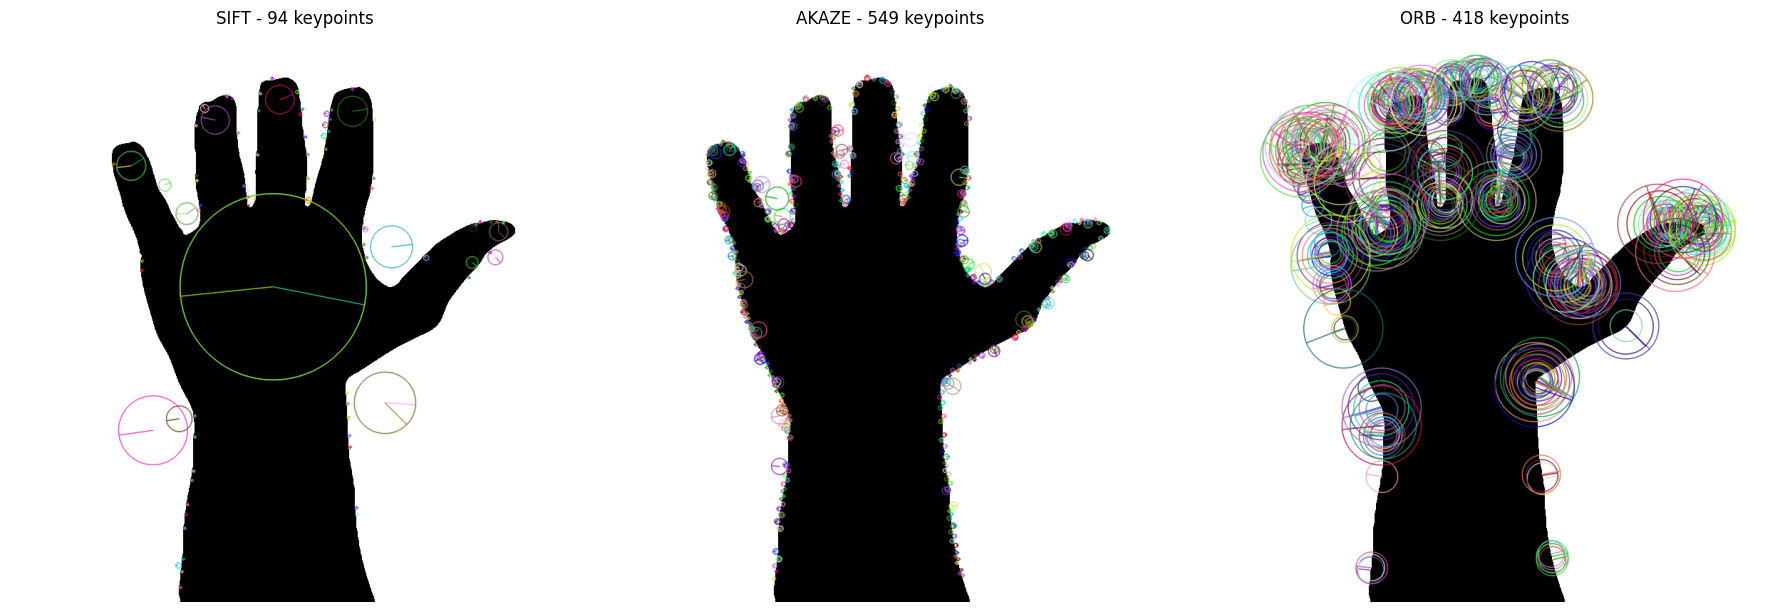


✓ Procesamiento de descriptores completado para mano-abierta_mask
  - Carpeta: data/caracteristicas/descriptores/mano-abierta_mask/
  - Archivos guardados:
    • sift_keypoints.jpg
    • sift_descriptors.npy
    • akaze_keypoints.jpg
    • akaze_descriptors.npy
    • orb_keypoints.jpg
    • orb_descriptors.npy
    • comparacion_descriptores.jpg
    • metricas.txt

Extrayendo descriptores de: mano-cerrada_mask
  ✓ SIFT: 79 keypoints detectados
  ✓ AKAZE: 387 keypoints detectados
  ✓ ORB: 431 keypoints detectados


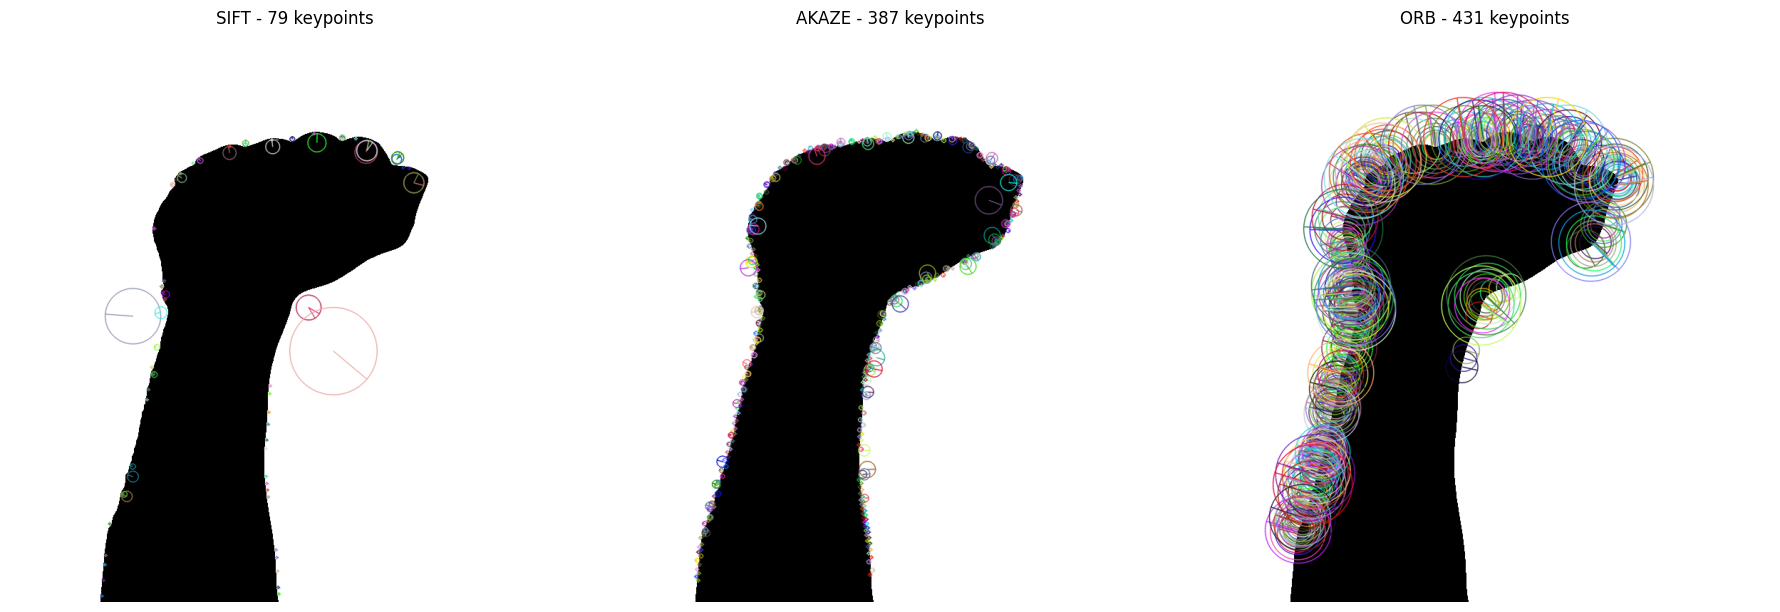


✓ Procesamiento de descriptores completado para mano-cerrada_mask
  - Carpeta: data/caracteristicas/descriptores/mano-cerrada_mask/
  - Archivos guardados:
    • sift_keypoints.jpg
    • sift_descriptors.npy
    • akaze_keypoints.jpg
    • akaze_descriptors.npy
    • orb_keypoints.jpg
    • orb_descriptors.npy
    • comparacion_descriptores.jpg
    • metricas.txt

Extrayendo descriptores de: mano-pulgar_mask
  ✓ SIFT: 79 keypoints detectados
  ✓ AKAZE: 450 keypoints detectados
  ✓ ORB: 434 keypoints detectados


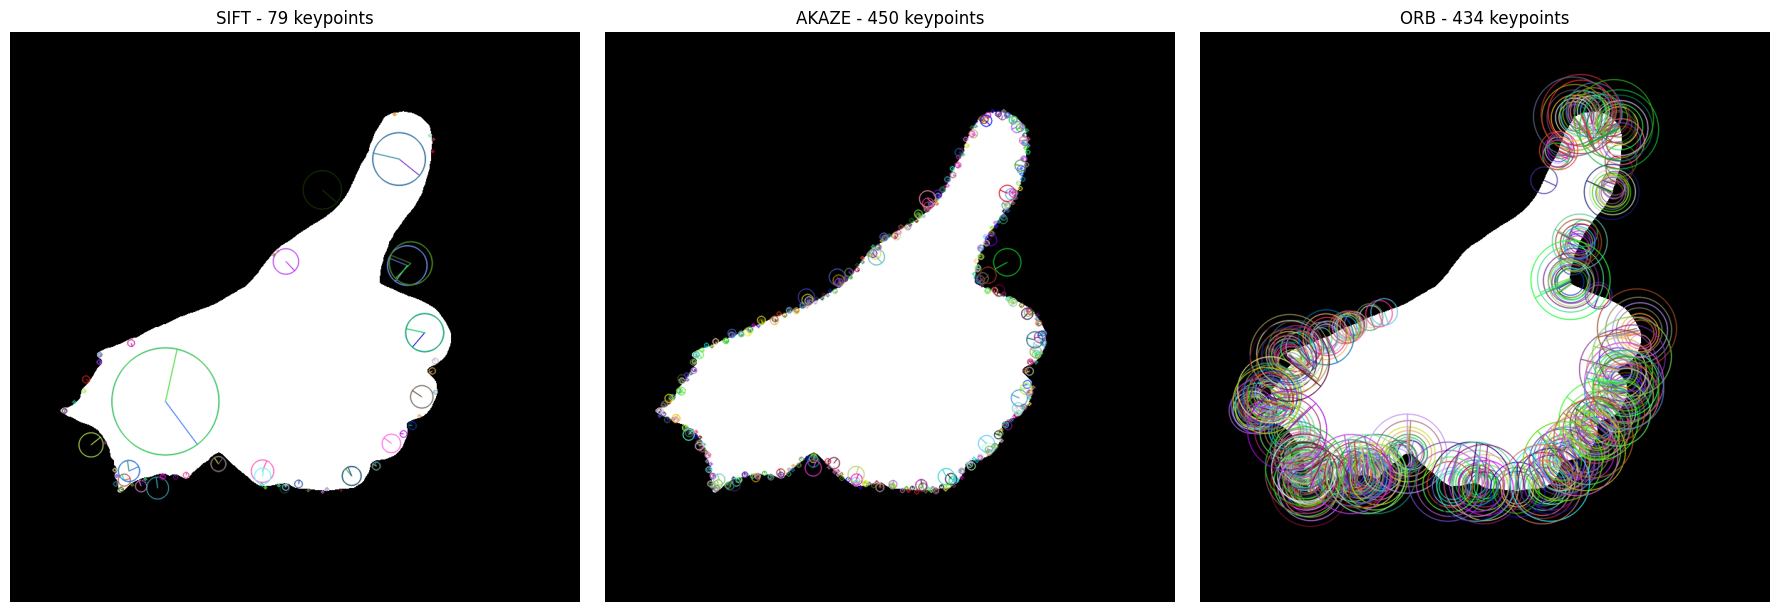


✓ Procesamiento de descriptores completado para mano-pulgar_mask
  - Carpeta: data/caracteristicas/descriptores/mano-pulgar_mask/
  - Archivos guardados:
    • sift_keypoints.jpg
    • sift_descriptors.npy
    • akaze_keypoints.jpg
    • akaze_descriptors.npy
    • orb_keypoints.jpg
    • orb_descriptors.npy
    • comparacion_descriptores.jpg
    • metricas.txt

¡Extracción de descriptores completada para todas las imágenes!


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Rutas y lista
os.makedirs('data/caracteristicas', exist_ok=True)
os.makedirs('data/caracteristicas/descriptores', exist_ok=True)

imagenes = ['data/procesadas/mano-abierta_mask.png', 'data/procesadas/mano-cerrada_mask.png', 'data/procesadas/mano-pulgar_mask.png']

print("Descriptores a utilizar: SIFT, AKAZE, ORB")
print("Nota: SURF está patentado y deshabilitado. AKAZE es una excelente alternativa libre.\n")

for imagen in imagenes:
    img_name = os.path.splitext(os.path.basename(imagen))[0]
    
    print(f"\n{'='*50}")
    print(f"Extrayendo descriptores de: {img_name}")
    print(f"{'='*50}")

    img = cv2.imread(imagen)
    if img is None:
        print(f"No se pudo leer la imagen '{imagen}'")
        continue

    # Leer la imagen en escala de grises
    gray = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)

    # Crear carpeta específica para esta imagen
    output_dir = os.path.join('data/caracteristicas/descriptores', img_name)
    os.makedirs(output_dir, exist_ok=True)

    # Diccionario para almacenar métricas
    all_metrics = {}
    images_dict = {}

    # --- SIFT ---
    try:
        sift = cv2.SIFT_create()
        kp_sift, des_sift = sift.detectAndCompute(gray, None)
        
        # Dibujar keypoints
        img_sift = cv2.drawKeypoints(gray, kp_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        images_dict['SIFT'] = img_sift
        
        # Guardar imagen
        output_path_sift = os.path.join(output_dir, "sift_keypoints.jpg")
        cv2.imwrite(output_path_sift, img_sift)
        
        # Guardar descriptores
        if des_sift is not None:
            np.save(os.path.join(output_dir, "sift_descriptors.npy"), des_sift)
        
        all_metrics['SIFT'] = {
            'Keypoints': len(kp_sift),
            'Descriptores': des_sift.shape if des_sift is not None else (0, 0)
        }
        
        print(f"  ✓ SIFT: {len(kp_sift)} keypoints detectados")
        
    except Exception as e:
        print(f"  ✗ Error en SIFT: {str(e)}")
        all_metrics['SIFT'] = {'Error': str(e)}

    # --- AKAZE (alternativa libre a SURF) ---
    try:
        akaze = cv2.AKAZE_create()
        kp_akaze, des_akaze = akaze.detectAndCompute(gray, None)
        
        # Dibujar keypoints
        img_akaze = cv2.drawKeypoints(gray, kp_akaze, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        images_dict['AKAZE'] = img_akaze
        
        # Guardar imagen
        output_path_akaze = os.path.join(output_dir, "akaze_keypoints.jpg")
        cv2.imwrite(output_path_akaze, img_akaze)
        
        # Guardar descriptores
        if des_akaze is not None:
            np.save(os.path.join(output_dir, "akaze_descriptors.npy"), des_akaze)
        
        all_metrics['AKAZE'] = {
            'Keypoints': len(kp_akaze),
            'Descriptores': des_akaze.shape if des_akaze is not None else (0, 0)
        }
        
        print(f"  ✓ AKAZE: {len(kp_akaze)} keypoints detectados")
        
    except Exception as e:
        print(f"  ✗ Error en AKAZE: {str(e)}")
        all_metrics['AKAZE'] = {'Error': str(e)}

    # --- ORB ---
    try:
        orb = cv2.ORB_create()
        kp_orb, des_orb = orb.detectAndCompute(gray, None)
        
        # Dibujar keypoints
        img_orb = cv2.drawKeypoints(gray, kp_orb, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        images_dict['ORB'] = img_orb
        
        # Guardar imagen
        output_path_orb = os.path.join(output_dir, "orb_keypoints.jpg")
        cv2.imwrite(output_path_orb, img_orb)
        
        # Guardar descriptores
        if des_orb is not None:
            np.save(os.path.join(output_dir, "orb_descriptors.npy"), des_orb)
        
        all_metrics['ORB'] = {
            'Keypoints': len(kp_orb),
            'Descriptores': des_orb.shape if des_orb is not None else (0, 0)
        }
        
        print(f"  ✓ ORB: {len(kp_orb)} keypoints detectados")
        
    except Exception as e:
        print(f"  ✗ Error en ORB: {str(e)}")
        all_metrics['ORB'] = {'Error': str(e)}

    # Guardar métricas en archivo de texto
    metrics_file = os.path.join(output_dir, "metricas.txt")
    with open(metrics_file, 'w') as f:
        f.write(f"=== Métricas de descriptores de características - {img_name} ===\n\n")
        
        for method, metrics in all_metrics.items():
            f.write(f"{method}:\n")
            if 'Error' in metrics:
                f.write(f"  - Estado: Error\n")
                f.write(f"  - Detalle: {metrics['Error']}\n")
            else:
                f.write(f"  - Número de keypoints: {metrics['Keypoints']}\n")
                f.write(f"  - Dimensión de descriptores: {metrics['Descriptores']}\n")
            f.write("\n")

    # Crear visualización comparativa (solo con métodos disponibles)
    num_methods = len(images_dict)
    if num_methods > 0:
        fig, axes = plt.subplots(1, num_methods, figsize=(6*num_methods, 6))
        if num_methods == 1:
            axes = [axes]  # Convertir a lista si solo hay un método
        
        for idx, (method, img_result) in enumerate(images_dict.items()):
            axes[idx].imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
            axes[idx].set_title(f"{method} - {all_metrics[method]['Keypoints']} keypoints")
            axes[idx].axis('off')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, "comparacion_descriptores.jpg"), dpi=150, bbox_inches='tight')
        plt.show()

    # Mostrar información en consola
    print(f"\n✓ Procesamiento de descriptores completado para {img_name}")
    print(f"  - Carpeta: {output_dir}/")
    print(f"  - Archivos guardados:")
    available_methods = [m for m in ['SIFT', 'AKAZE', 'ORB'] if 'Error' not in all_metrics.get(m, {})]
    for method in available_methods:
        print(f"    • {method.lower()}_keypoints.jpg")
        print(f"    • {method.lower()}_descriptors.npy")
    print(f"    • comparacion_descriptores.jpg")
    print(f"    • metricas.txt")

print("\n¡Extracción de descriptores completada para todas las imágenes!")